# Web Scraping External Data

In [54]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = 'https://webscraper.io/test-sites/e-commerce/allinone/computers/laptops'
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

# Initialize lists
names = []
prices = []
descs = []
ratings = []
reviews = []

# Select all product containers
products = soup.select('div.thumbnail')

for product in products:
    # Product name
    name = product.select_one('a.title')
    names.append(name.text.strip() if name else None)

    # Price
    price = product.select_one('h4.price')
    prices.append(price.text.strip() if price else None)

    # Description
    desc = product.select_one('p.description')
    descs.append(desc.text.strip() if desc else None)

    #Review
    review = product.select_one('div.ratings p.review-count span[itemprop="reviewCount"]')
    reviews.append(int(review.text.strip()) if review else 0) 

    #Rating
    rating = product.select_one('div.ratings p[data-rating]')
    ratings.append(float(rating['data-rating']) if rating else 0) 
    
df['Rating (Stars)'] = ratings
df['Review Count'] = reviews

# Create DataFrame
df = pd.DataFrame({
    'Product Name': names,
    'Price': prices,
    'Description': descs,
    'Rating (Stars)': ratings,
    'Review Count': reviews
})

# Show sample results
print(df)

          Product Name    Price  \
0     Asus VivoBook...  $295.99   
1    Prestigio Smar...     $299   
2    Prestigio Smar...     $299   
3        Aspire E1-510  $306.99   
4    Lenovo V110-15...  $321.94   
..                 ...      ...   
112   Lenovo Legion...    $1399   
113  Asus ROG Strix...    $1399   
114  Asus ROG Strix...    $1769   
115  Asus ROG Strix...    $1769   
116  Asus ROG Strix...    $1799   

                                           Description  Rating (Stars)  \
0    Asus VivoBook X441NA-GA190 Chocolate Black, 14...             3.0   
1    Prestigio SmartBook 133S Dark Grey, 13.3" FHD ...             2.0   
2    Prestigio SmartBook 133S Gold, 13.3" FHD IPS, ...             4.0   
3      15.6", Pentium N3520 2.16GHz, 4GB, 500GB, Linux             3.0   
4    Lenovo V110-15IAP, 15.6" HD, Celeron N3350 1.1...             3.0   
..                                                 ...             ...   
112  Lenovo Legion Y720, 15.6" FHD IPS, Core i7-770...       

# Top 10 products by price

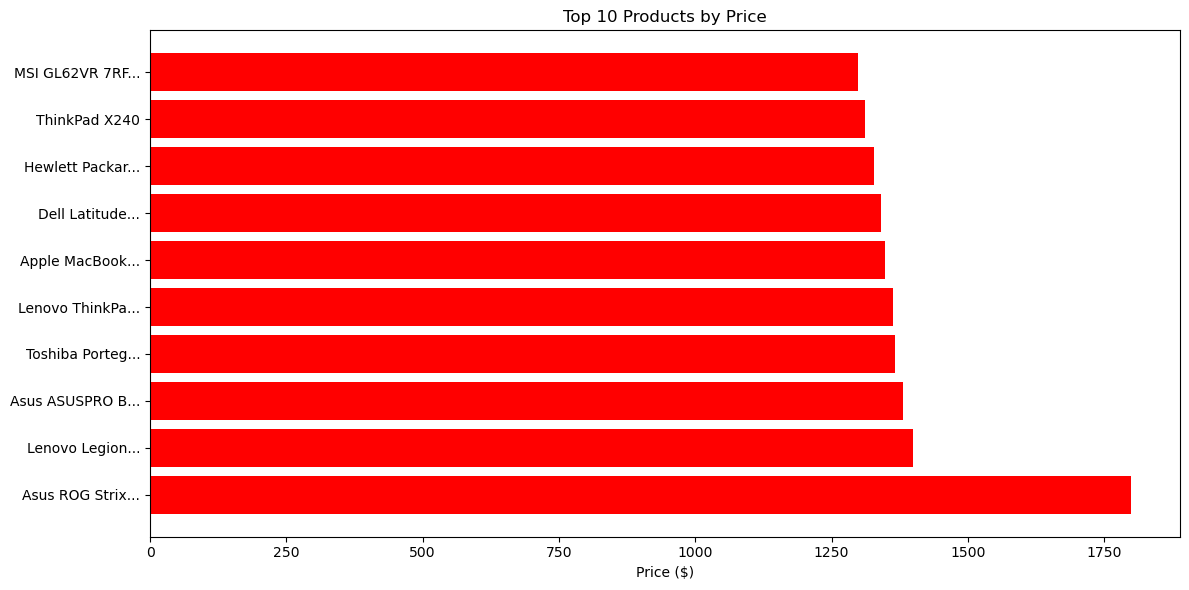

In [46]:
import matplotlib.pyplot as plt

top_price = df.sort_values(by='Price', ascending=False).head(18)

plt.figure(figsize=(12, 6))
plt.barh(top_price['Product Name'], top_price['Price'], color='red')
plt.xlabel('Price ($)')
plt.title('Top 10 Products by Price')
plt.tight_layout()
plt.show()

# Top 10 products by rating

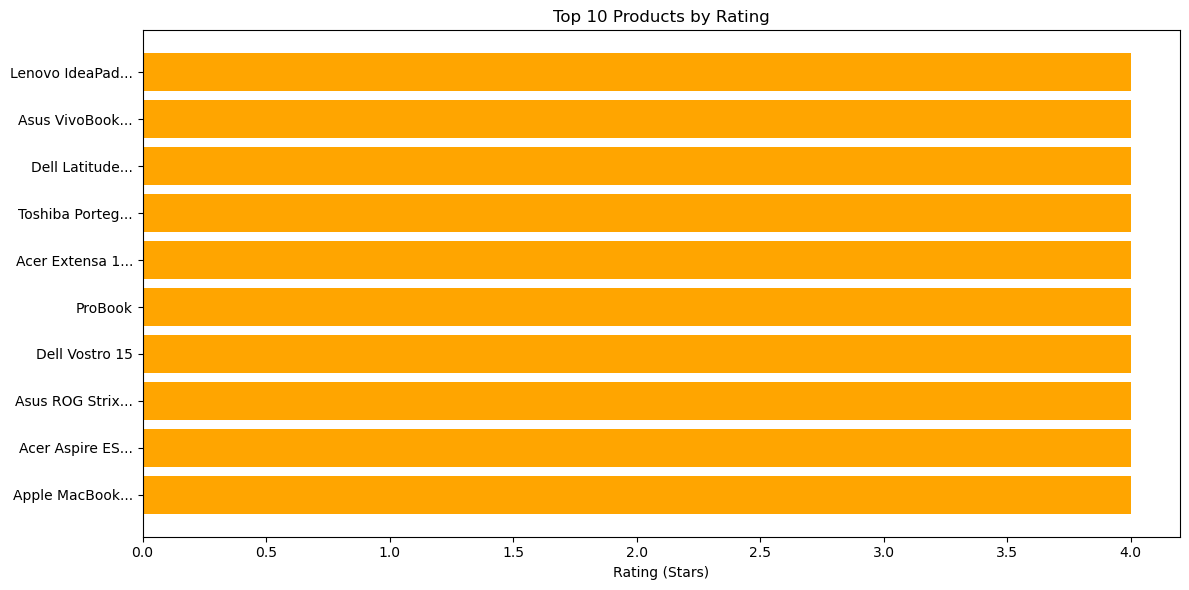

In [51]:
top_rating = df.sort_values(by='Rating (Stars)', ascending=False).head(11)

plt.figure(figsize=(12, 6))
plt.barh(top_rating['Product Name'], top_rating['Rating (Stars)'], color='orange')
plt.xlabel('Rating (Stars)')
plt.title('Top 10 Products by Rating')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Top 10 products by number of reviews

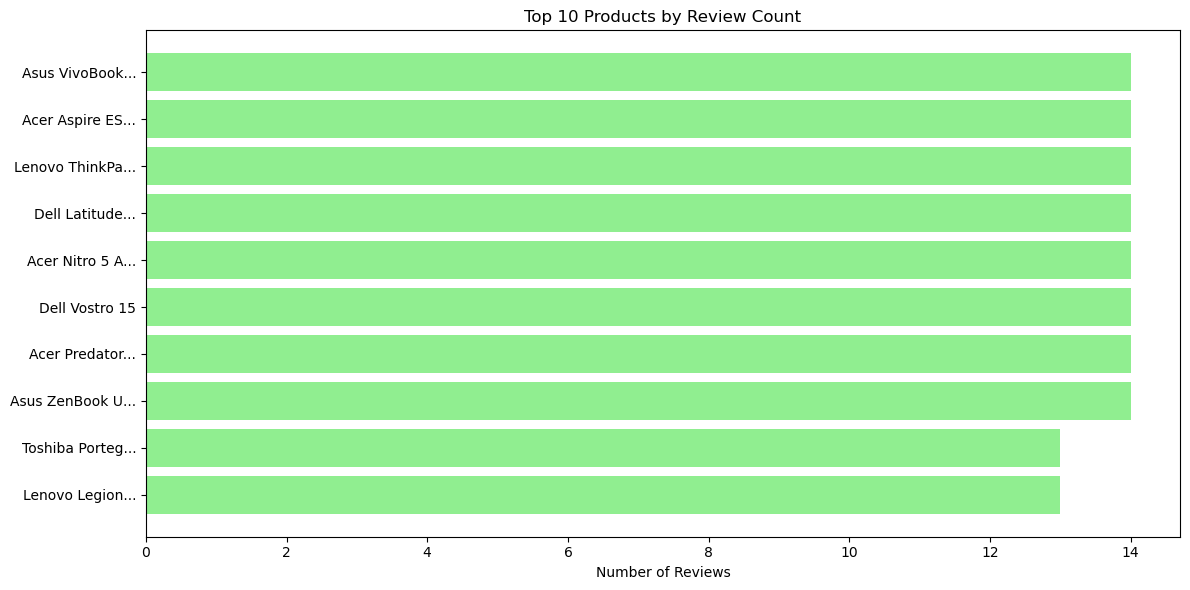

In [53]:
top_reviews = df.sort_values(by='Review Count', ascending=False).head(11)

plt.figure(figsize=(12, 6))
plt.barh(top_reviews['Product Name'], top_reviews['Review Count'], color='lightgreen')
plt.xlabel('Number of Reviews')
plt.title('Top 10 Products by Review Count')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()